In [2]:
from google.colab import files
uploaded =  files.upload()

Saving defect_data_raw_unclean.csv to defect_data_raw_unclean.csv


In [3]:
import pandas as pd

df = pd.read_csv("defect_data_raw_unclean.csv")
df.head()

,DefectID,PartID,PartName,ToolID,MachineID,Date,Shift,DefectType,Severity,CostImpactINR,Material,CycleTime_s,Supplier,LotNo,Inspector,ReworkHours
0,D10000,P002,Door Trim - RH,T01,M05,2025-08-21,Day,Warp,Minor,201.0,PP,33.7,SupplierA,L7912,Inspector_A,0.06
1,D10001,P001,Door Trim - LH,T02,M04,2025-07-15,Day,Flash,Minor,178.0,PP,28.3,SupplierD,L4611,Inspector_H,0.23
2,D10002,P010,Sun Visor Trim,T05,M01,2025-09-10,Swing,Warp,Minor,195.0,ABS,28.5,SupplierB,L6514,Inspector_B,0.07
3,D10003,P002,Door Trim - RH,T07,M02,2025-08-30,Day,Warping,Minor,365.0,ABS,37.1,SupplierD,L9785,Inspector_B,0.37
4,D10004,P007,Dashboard Side Trim,T02,M05,2025-07-21,Swing,Flash,Major,1432.0,PC-ABS,36.9,SupplierA,L1750,Inspector_D,0.81


DATA PROFILING


In [4]:
# 1. Shape of dataset (rows x columns)
print (" ➡️Dataset Shape: ")
print (df.shape)


 ➡️Dataset Shape: 
(510, 16)


In [5]:
# Missing values
print (" ➡️Missing Values:")
(df.isnull().sum() / len(df) * 100 ).round(2)

 ➡️Missing Values:


,0
DefectID,0.00
PartID,0.00
PartName,0.00
ToolID,0.00
MachineID,0.00
Date,0.00
Shift,0.00
DefectType,2.16
Severity,0.00
CostImpactINR,3.92


In [6]:
# 3. Data types of each column (profiling only)
print("➡️ Data types of each column:")
print(df.dtypes)

➡️ Data types of each column:
DefectID          object
PartID            object
PartName          object
ToolID            object
MachineID         object
Date              object
Shift             object
DefectType        object
Severity          object
CostImpactINR    float64
Material          object
CycleTime_s      float64
Supplier          object
LotNo             object
Inspector         object
ReworkHours      float64
dtype: object


In [7]:
# 4. Unique value counts per column
print("➡️ Unique value counts per column:")
print(df.nunique())


➡️ Unique value counts per column:
DefectID         500
PartID            10
PartName          10
ToolID            10
MachineID          8
Date              90
Shift              3
DefectType         9
Severity           3
CostImpactINR    372
Material           5
CycleTime_s      212
Supplier           4
LotNo            490
Inspector         10
ReworkHours      183
dtype: int64


In [8]:
# 5. Duplicate checks

# Full-row duplicates (completely same across all columns)
print("➡️ Full-row duplicate rows:",df.duplicated().sum())

➡️ Full-row duplicate rows: 4


In [9]:
# Identify which rows are duplicates
df[df.duplicated()]


,DefectID,PartID,PartName,ToolID,MachineID,Date,Shift,DefectType,Severity,CostImpactINR,Material,CycleTime_s,Supplier,LotNo,Inspector,ReworkHours
500,D10361,P010,Sun Visor Trim,T09,M03,2025-08-02,Day,NaN,Major,NaN,NaN,32.2,SupplierC,L9761,Inspector_J,1.77
501,D10073,P002,Door Trim - RH,T03,M04,2025-07-18,Day,Warp,Minor,NaN,NaN,33.3,SupplierD,L5771,Inspector_A,0.09
504,D10104,P007,Dashboard Side Trim,T02,M03,2025-07-01,Day,Warp,Critical,NaN,NaN,17.2,SupplierB,L9807,Inspector_C,4.54
509,D10450,P006,B-Pillar Trim,T01,M01,2025-08-26,Swing,NaN,Minor,NaN,NaN,31.0,SupplierC,L4066,Inspector_I,0.33


In [10]:
# Confirm by checking first + duplicate copy:

df[df.duplicated(keep=False)]


,DefectID,PartID,PartName,ToolID,MachineID,Date,Shift,DefectType,Severity,CostImpactINR,Material,CycleTime_s,Supplier,LotNo,Inspector,ReworkHours
73,D10073,P002,Door Trim - RH,T03,M04,2025-07-18,Day,Warp,Minor,NaN,NaN,33.3,SupplierD,L5771,Inspector_A,0.09
104,D10104,P007,Dashboard Side Trim,T02,M03,2025-07-01,Day,Warp,Critical,NaN,NaN,17.2,SupplierB,L9807,Inspector_C,4.54
361,D10361,P010,Sun Visor Trim,T09,M03,2025-08-02,Day,NaN,Major,NaN,NaN,32.2,SupplierC,L9761,Inspector_J,1.77
450,D10450,P006,B-Pillar Trim,T01,M01,2025-08-26,Swing,NaN,Minor,NaN,NaN,31.0,SupplierC,L4066,Inspector_I,0.33
500,D10361,P010,Sun Visor Trim,T09,M03,2025-08-02,Day,NaN,Major,NaN,NaN,32.2,SupplierC,L9761,Inspector_J,1.77
501,D10073,P002,Door Trim - RH,T03,M04,2025-07-18,Day,Warp,Minor,NaN,NaN,33.3,SupplierD,L5771,Inspector_A,0.09
504,D10104,P007,Dashboard Side Trim,T02,M03,2025-07-01,Day,Warp,Critical,NaN,NaN,17.2,SupplierB,L9807,Inspector_C,4.54
509,D10450,P006,B-Pillar Trim,T01,M01,2025-08-26,Swing,NaN,Minor,NaN,NaN,31.0,SupplierC,L4066,Inspector_I,0.33


In [11]:
# drop duplicates
df = df.drop_duplicates()


In [12]:
# Identify which rows are duplicates
df[df.duplicated()]


,DefectID,PartID,PartName,ToolID,MachineID,Date,Shift,DefectType,Severity,CostImpactINR,Material,CycleTime_s,Supplier,LotNo,Inspector,ReworkHours


In [13]:
# Check sample unique values for categorical columns
for col in ['DefectType', 'Severity', 'Supplier', 'Shift', 'Inspector']:
    print(f"\n➡️ Unique values in {col}:")
    print(df[col].unique())



➡️ Unique values in DefectType:
['Warp ' 'Flash' 'Warping' 'Knit Line' 'Sink Mark' 'Dimensional Deviation'
 'Short Shot' 'Surface Scratch' 'Burn Mark' nan]

➡️ Unique values in Severity:
['Minor' 'Major' 'Critical']

➡️ Unique values in Supplier:
['SupplierA' 'SupplierD' 'SupplierB' 'SupplierC']

➡️ Unique values in Shift:
['Day' 'Swing' 'Night']

➡️ Unique values in Inspector:
['Inspector_A' 'Inspector_H' 'Inspector_B' 'Inspector_D' 'Inspector_F'
 'Inspector_I' 'Inspector_G' 'Inspector_E' 'Inspector_C' 'Inspector_J']


In [14]:
# 7. Numeric summary for all numeric columns
num_cols = df.select_dtypes(include=['number']).columns.tolist()
print("➡️ Numeric columns:", num_cols)

print("\n➡️ Summary statistics for numeric columns:")
print(df[num_cols].describe().T)


➡️ Numeric columns: ['CostImpactINR', 'CycleTime_s', 'ReworkHours']

➡️ Summary statistics for numeric columns:
               count         mean          std     min       25%      50%  \
CostImpactINR  490.0  1225.144898  1985.111094  133.00  248.0000  353.000   
CycleTime_s    506.0    33.770158    15.866829    2.00   28.5000   32.850   
ReworkHours    506.0     1.843814    12.005289    0.03    0.1725    0.335   

                    75%      max  
CostImpactINR  1458.000  12042.0  
CycleTime_s      37.500    300.0  
ReworkHours       0.925    200.0  


In [15]:
import matplotlib.pyplot as plt


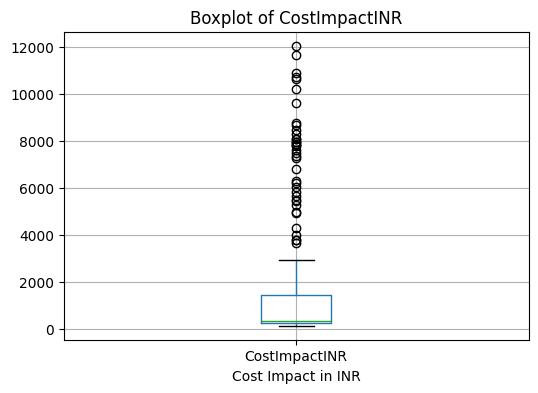

In [17]:
plt.figure(figsize=(6,4))
df.boxplot(column ='CostImpactINR', vert = True)
plt.title("Boxplot of CostImpactINR")
plt.xlabel("Cost Impact in INR")
plt.show()

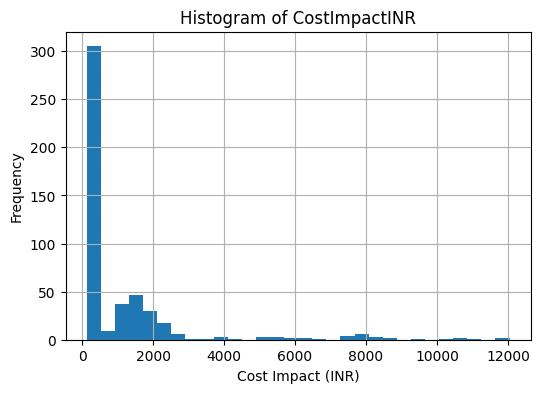

In [16]:

plt.figure(figsize=(6,4))
df['CostImpactINR'].hist(bins=30)   # change column name here
plt.title("Histogram of CostImpactINR")
plt.xlabel("Cost Impact (INR)")
plt.ylabel("Frequency")
plt.show()


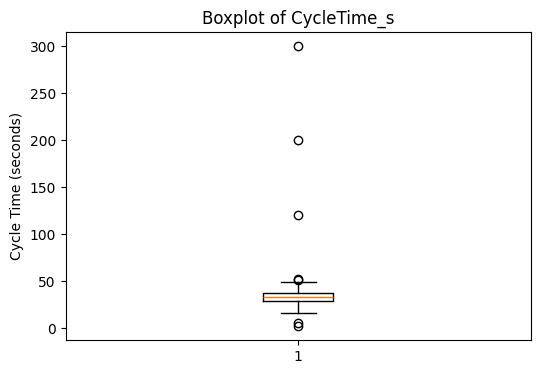

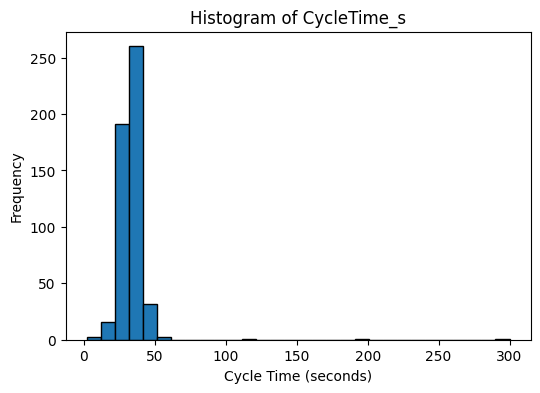

In [17]:


# Boxplot
plt.figure(figsize=(6,4))
plt.boxplot(df['CycleTime_s'].dropna())
plt.title("Boxplot of CycleTime_s")
plt.ylabel("Cycle Time (seconds)")
plt.show()

# Histogram
plt.figure(figsize=(6,4))
plt.hist(df['CycleTime_s'].dropna(), bins=30, edgecolor='black')
plt.title("Histogram of CycleTime_s")
plt.xlabel("Cycle Time (seconds)")
plt.ylabel("Frequency")
plt.show()


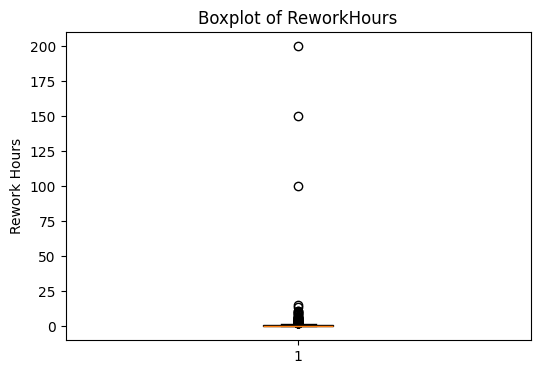

In [18]:


plt.figure(figsize=(6,4))
plt.boxplot(df['ReworkHours'].dropna(), vert=True, patch_artist=True)
plt.title("Boxplot of ReworkHours")
plt.ylabel("Rework Hours")
plt.show()


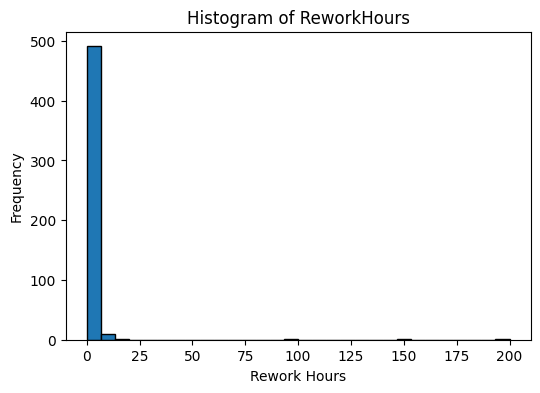

In [19]:
plt.figure(figsize=(6,4))
plt.hist(df['ReworkHours'].dropna(), bins=30, edgecolor='black')
plt.title("Histogram of ReworkHours")
plt.xlabel("Rework Hours")
plt.ylabel("Frequency")
plt.show()


In [20]:
# Summary stats for numeric columns
# Purpose: find outliers and check data ranges
print("\n➡️ Summary stats for numeric columns:")
print(df.describe())



➡️ Summary stats for numeric columns:
       CostImpactINR  CycleTime_s  ReworkHours
count     490.000000   506.000000   506.000000
mean     1225.144898    33.770158     1.843814
std      1985.111094    15.866829    12.005289
min       133.000000     2.000000     0.030000
25%       248.000000    28.500000     0.172500
50%       353.000000    32.850000     0.335000
75%      1458.000000    37.500000     0.925000
max     12042.000000   300.000000   200.000000


In [21]:
# Value counts for categorical columns
# Purpose: confirm categories and detect messy labels

print("\n➡️ DefectType distribution:")
print(df['DefectType'].value_counts(dropna=False))

print("\n➡️ Supplier distribution:")
print(df['Supplier'].value_counts())

print("\n➡️ Severity distribution:")
print(df['Severity'].value_counts())



➡️ DefectType distribution:
DefectType
Warp                     100
Sink Mark                 81
Surface Scratch           63
Warping                   58
Knit Line                 51
Dimensional Deviation     42
Short Shot                41
Flash                     39
Burn Mark                 22
NaN                        9
Name: count, dtype: int64

➡️ Supplier distribution:
Supplier
SupplierD    139
SupplierC    126
SupplierA    121
SupplierB    120
Name: count, dtype: int64

➡️ Severity distribution:
Severity
Minor       315
Major       152
Critical     39
Name: count, dtype: int64


In [22]:
# Date range sanity check
# Purpose: ensure dates are realistic (not future/past errors)

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
print("\n➡️ Date range in dataset:")
print("From:", df['Date'].min(), "To:", df['Date'].max())



➡️ Date range in dataset:
From: 2025-07-01 00:00:00 To: 2025-09-28 00:00:00


In [23]:
df[df.duplicated()]

,DefectID,PartID,PartName,ToolID,MachineID,Date,Shift,DefectType,Severity,CostImpactINR,Material,CycleTime_s,Supplier,LotNo,Inspector,ReworkHours


In [24]:
# ✅ Step 1: Handle Missing Values for Automotive Defect Dataset

# --- 1a. DefectType (Categorical, 11 missing ~2.1%)
# Use mode (most frequent defect type)
df['DefectType'].fillna(df['DefectType'].mode()[0], inplace=True)

# --- 1b. Material (Categorical, 20 missing ~3.9%)
# Use mode (most frequent material)
df['Material'].fillna(df['Material'].mode()[0], inplace=True)

# --- 1c. CostImpactINR (Numeric, 20 missing ~3.9%)
# Use median grouped by DefectType (more realistic than global mean/median)
df['CostImpactINR'] = df.groupby('DefectType')['CostImpactINR'].transform(
    lambda x: x.fillna(x.median())
)

# --- 1d. (Optional) Keep a missing flag column for transparency
# This allows us to track which rows had missing CostImpactINR originally
df['CostImpactINR_missing'] = df['CostImpactINR'].isna().astype(int)

# --- 1e. Verify missing values after imputation
print("✅ Missing values after Step 1:")
print(df.isnull().sum())


✅ Missing values after Step 1:
DefectID                 0
PartID                   0
PartName                 0
ToolID                   0
MachineID                0
Date                     0
Shift                    0
DefectType               0
Severity                 0
CostImpactINR            0
Material                 0
CycleTime_s              0
Supplier                 0
LotNo                    0
Inspector                0
ReworkHours              0
CostImpactINR_missing    0
dtype: int64


/tmp/ipython-input-2774519024.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['DefectType'].fillna(df['DefectType'].mode()[0], inplace=True)
/tmp/ipython-input-2774519024.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

In [25]:
# Step 2: Standardize Category Labels

# --- 2a. Remove leading/trailing spaces in all string columns
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip()

# --- 2b. Fix known typos/inconsistencies in DefectType
df['DefectType'] = df['DefectType'].replace({
    'Warping': 'Warp',    # merge 'Warping' into 'Warp'
    'Warp ': 'Warp'       # remove extra space case
})

# --- 2c. Verify categories after cleanup
print("✅ Unique Defect Types after cleanup:")
print(df['DefectType'].unique())


✅ Unique Defect Types after cleanup:
['Warp' 'Flash' 'Knit Line' 'Sink Mark' 'Dimensional Deviation'
 'Short Shot' 'Surface Scratch' 'Burn Mark']


In [26]:
# Step 3: Handle Outliers

# --- 3a. CostImpactINR (numeric, skewed)
Q1 = df['CostImpactINR'].quantile(0.25)
Q3 = df['CostImpactINR'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df['CostImpactINR'] = df['CostImpactINR'].clip(lower, upper)

# --- 3b. CycleTime_s (numeric, error-prone)
# Drop rows with extreme cycle times >200 sec
df = df[df['CycleTime_s'] <= 200]

# --- 3c. ReworkHours (numeric, long-tail)
# Cap max value at 20 hrs
df['ReworkHours'] = df['ReworkHours'].clip(upper=20)

# --- 3d. Verify results
print("✅ Outlier handling complete.")
print("CostImpactINR range:", df['CostImpactINR'].min(), "to", df['CostImpactINR'].max())
print("CycleTime_s max:", df['CycleTime_s'].max())
print("ReworkHours max:", df['ReworkHours'].max())


✅ Outlier handling complete.
CostImpactINR range: 133.0 to 3204.625
CycleTime_s max: 200.0
ReworkHours max: 20.0


In [27]:
# ---------------------------
# Step 4: Drop unnecessary columns, final tidy-up, save cleaned CSV
# ---------------------------

# 4.0 Safety: make a quick backup copy of the cleaned DataFrame (in-memory)
df_backup = df.copy()

# 4.1 Columns we will drop (project-specific)
# - LotNo: very high cardinality (490 unique out of ~510 rows) → not useful for aggregate analysis
# Add any other columns you want to drop to this list
drop_cols = ['LotNo']   # <-- add column names here if you want to drop more

# 4.2 Show columns and a brief reason before dropping (for your PPT / audit)
print("Columns in dataset:", df.columns.tolist())
print("\nPlanned to drop:", drop_cols)

# 4.3 Drop the columns (in-place)
df.drop(columns=[c for c in drop_cols if c in df.columns], inplace=True)

# 4.4 Final type conversions / tidy-ups (if needed)
# - Ensure Date is datetime (if not already)
if df['Date'].dtype == 'object':
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# - Optionally, reset index (useful after row drops)
df.reset_index(drop=True, inplace=True)

# 4.5 Quick sanity checks after drop
print("\nShape after dropping:", df.shape)
print("\nColumns now:", df.columns.tolist())
print("\nMissing values (post-clean):")
print(df.isnull().sum())

# 4.6 Save cleaned dataset to CSV
out_fn = "defect_data_clean_v1.csv"
df.to_csv(out_fn, index=False)
print(f"\n✅ Cleaned dataset saved to: {out_fn}")

# 4.7 If you want to restore backup (undo drop), uncomment the next line:
# df = df_backup.copy()


Columns in dataset: ['DefectID', 'PartID', 'PartName', 'ToolID', 'MachineID', 'Date', 'Shift', 'DefectType', 'Severity', 'CostImpactINR', 'Material', 'CycleTime_s', 'Supplier', 'LotNo', 'Inspector', 'ReworkHours', 'CostImpactINR_missing']

Planned to drop: ['LotNo']

Shape after dropping: (505, 16)

Columns now: ['DefectID', 'PartID', 'PartName', 'ToolID', 'MachineID', 'Date', 'Shift', 'DefectType', 'Severity', 'CostImpactINR', 'Material', 'CycleTime_s', 'Supplier', 'Inspector', 'ReworkHours', 'CostImpactINR_missing']

Missing values (post-clean):
DefectID                 0
PartID                   0
PartName                 0
ToolID                   0
MachineID                0
Date                     0
Shift                    0
DefectType               0
Severity                 0
CostImpactINR            0
Material                 0
CycleTime_s              0
Supplier                 0
Inspector                0
ReworkHours              0
CostImpactINR_missing    0
dtype: int64



In [28]:
print (" ➡️Dataset Shape: ")
print (df.shape)

 ➡️Dataset Shape: 
(505, 16)


In [29]:
from google.colab import files
files.download("defect_data_clean_v1.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>